# We will use this heart disease classification dataset to predict which patients are most likely to suffer from a heart disease in the near future.



## Data Dictionary
        sex: 1 = male 0 = female
        cp: Chest-pain type: 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic
        trestbps: Resting Blood Pressure in mmHg (unit). anything above 130-140 is typically cause for concern.
        chol: Serum Cholestrol in mg/dl (unit)
        fbs: Fasting Blood Sugar: If fasting blood sugar > 120mg/dl then : 1=true, 0=false.
        restecg: Resting ECG : 0 = normal, 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
        thalach: Max heart rate achieved.
        exang: Exercise induced angina : 1 = yes 0 = no
        oldpeak: ST depression induced by exercise relative to rest: value - integer/float
        slope: 0 = upsloping, better heart-rate in excercise 1 = flat, minimal change, 2 = downsloping:signs unhealthy heart
        ca: Number of major vessels (0–3) colored by flourosopy - as integer or float.
        thal : thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
        target : whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_excel('heart disease classification dataset.xls')
df.setIndex = "Unnamed: 0"
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


### find and fill the empty cells

In [47]:
nulls = df.isnull().sum()
nulls

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [88]:
df['thalach'] = df.fillna(value =df['thalach'].mean())
df['chol'] = df.fillna(value = df['chol'].mean())
df['trestbps']= df.fillna(value = df['trestbps'].mean())
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

### Divide to train/test dataset

In [102]:
x = df.drop (['target'], axis=1)
y = df['target']

### Is there a difference between women and men?

In [120]:
sex_separate = df.groupby(["sex",'target']).size()
sex_separate

sex     target
female  no         24
        yes        72
male    no        114
        yes        93
dtype: int64

### The compare of Serum Cholestrol and Resting Blood Pressure

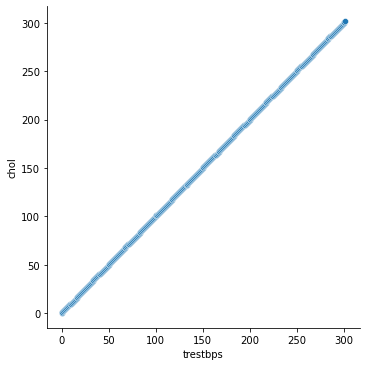

In [131]:
sns.relplot(x=df['trestbps'] ,y=df['chol'],  data=df)